# Structural_motifs

Recall that the SBL provides three executables to mine motifs shared by two structures:
* sbl-structural-motifs-conformations.exe
* sbl-structural-motifs-chains-apurva.exe  and sbl-structural-motifs-chains-kpax.exe , which use two different methods for seed alignments, namely
Apurva and Kpax.

<p> The main difference is that for conformations of the same molecule, we do not need to compute any alignment.

<p> In the sequel, we focus on conformations -- using the remaining two executables is similar.
     

## Useful general functions

## Case study I: extracting motifs using  Conserved Distances (CD) filtration


### Run the calculation 

In [1]:
from SBL.Structural_motifs import *
from SBL.SBL_pytools import SBL_pytools as sblpyt
#help(sblpyt)



# Structural motifs general options
smgo = Structural_motifs_general_options()
smgo.update_mode("conformations")
print("General options are: ", str(smgo))



# Prepare the 4-tuple to be processed
smgo.set("input_dir", "fusion-class-II")
data = ("1SVB.pdb", "A", "1URZ.pdb", "A")

# Create an instance of the algo and run it
sm_for_pairs = Structural_motifs_computer_for_pair(smgo)
res_triple = sm_for_pairs.process_two_structures( data )
res_triple.dump()



General options are:  {'input_dir': '', 'input_list': '', 'occupancy': 4, 'mode': 'conformations', 'use_sfd': False, 'min_motif_size': 10, 'lrmsd_ratio': 0.8, 'pd_dist_threshold': 0.8, 'show_diagrams': False, 'odir_root': 'results', 'verbose': False, 'dry': False, 'aligner': 'identity', 'exe': '/user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-structural-motifs-conformations.exe'}
/user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-structural-motifs-conformations.exe  --motif-size 10 --lrmsd-threshold 0.8 --allow-incomplete-chains -p 4 --pdb-file fusion-class-II/1SVB.pdb --chains A --pdb-file fusion-class-II/1URZ.pdb --chains A --directory-output results/identity-cd/1SVB-A--1URZ-A  --module-uid --log
Log file: results/identity-cd/1SVB-A--1URZ-A/sbl-structural-motifs-conformations__log.txt

Res-triple:
Aligner: identity
Concatenation of pdb ids: 1SVB-1URZ
Output directory: results/identity-cd/1SVB-A--1URZ-A


### Collect statistics and perform the plots 


* Socre plot. Recall that the C-alpha ranks are obtained from a structural distance score, namely the distance difference between two C-alpha carbons. If CA_i and CA_j are aligned to CA_i' and CA_j' respectively, the distance difference is s_ij = |d_ij - d_i'j'| where d_ij = |CA_i - CA_j|.  We can plot the s_ij scores against their respective C-alpha ranks.  

* Calpha distance plot. For a given C-alpha rank we can recover the corresponding C-alpha carbons CA_i and CA_j. We can then plot |CA_i - CA_j| (or |CA_i' - CA_j'| for the second structure) against the C-alpha rank. This gives us an indication on how the atoms are selected on the structure. Notice the distinctive sawtooth pattern indicating that atoms can be far apart and we do not necessarily process atoms adjacent to each other on the back-bone.

* Sequence shift plot.  For the same CA carbons (CA_i and CA_j), we assume their residue sequence numbers are i and j. We can then plot |i - j| (|i' - j'| for the second structure) against the C-alpha ranks. This gives us an indication on their proximity in the sequence. Once again we notice a distinctive sawtooth pattern.

Motif file is results/identity-cd/1SVB-A--1URZ-A/sbl-structural-motifs-conformations__persistent_motifs.xml
Log file is results/identity-cd/1SVB-A--1URZ-A/sbl-structural-motifs-conformations__log.txt
Initial alignment size: 376.0
Initial alignment lRMSD: 11.328041
XML: 1 / 1 files were loaded



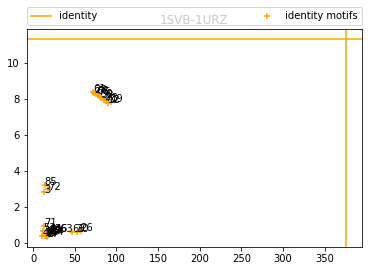

Score plot:


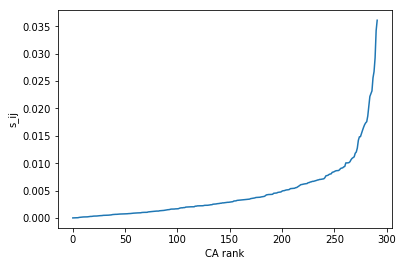

CA distance plots:


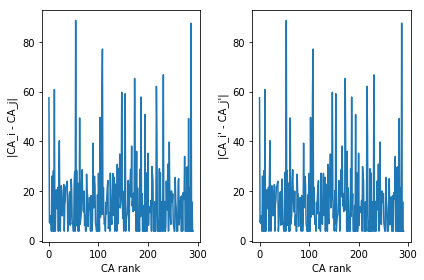

Sequence shift plots:


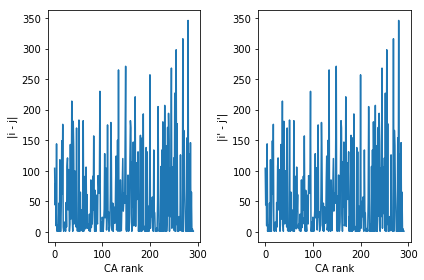

In [2]:
# Extract statistics and run plots  
(stats_size_cd, stats_lrmsd_cd) = Structural_motifs_renderer.render_pairwise_comparison_one_aligner(res_triple)
 

## Case study II: extracting motifs using the space filling diagram (SFD)  filtration
Sticking to our two original structures (conformations of the Tick-Borne Enciphalitis virus envelope protein), we study the incidence of the filtration on the results.
To this end, we re-run the previsous calculations passing
with the  --use-sfd-filtration option.

/user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-structural-motifs-conformations.exe  --motif-size 10 --lrmsd-threshold 0.8 --allow-incomplete-chains -p 4 --pdb-file fusion-class-II/1SVB.pdb --chains A --pdb-file fusion-class-II/1URZ.pdb --chains A --directory-output results/identity-sfd/1SVB-A--1URZ-A  --module-uid --log --use-sfd-filtration
Log file: results/identity-sfd/1SVB-A--1URZ-A/sbl-structural-motifs-conformations__log.txt

Res-triple:
Aligner: identity
Concatenation of pdb ids: 1SVB-1URZ
Output directory: results/identity-sfd/1SVB-A--1URZ-A
Motif file is results/identity-sfd/1SVB-A--1URZ-A/sbl-structural-motifs-conformations__persistent_motifs.xml
Log file is results/identity-sfd/1SVB-A--1URZ-A/sbl-structural-motifs-conformations__log.txt
Initial alignment size: 376.0
Initial alignment lRMSD: 11.328041
XML: 1 / 1 files were loaded



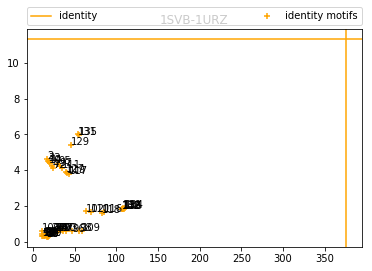

Score plot:


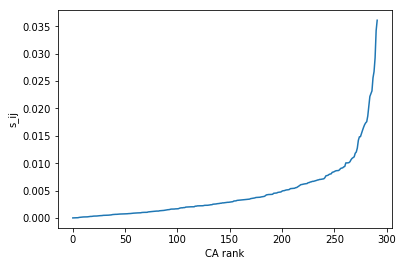

CA distance plots:


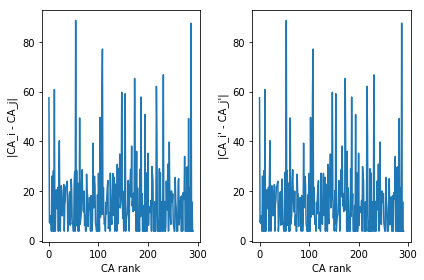

Sequence shift plots:


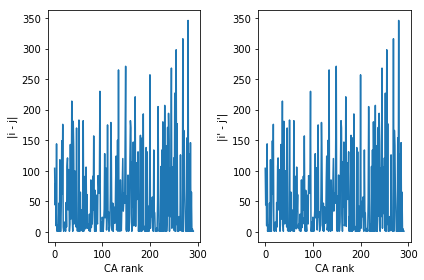

In [3]:
from SBL.Structural_motifs import *
from SBL.SBL_pytools import SBL_pytools as sblpyt
#help(sblpyt)

# Structural motifs general options
smgo = Structural_motifs_general_options()
smgo.update_mode("conformations")
smgo.set("use_sfd", True) # Use space filling diagram instead of conserved distances


# Prepare the 4-tuple to be processed
smgo.set("input_dir", "fusion-class-II")
data = ("1SVB.pdb", "A", "1URZ.pdb", "A")

# Create an instance of the algo and run it
sm_for_pairs = Structural_motifs_computer_for_pair(smgo)
res_triple = sm_for_pairs.process_two_structures( data )
res_triple.dump()

# Stats and plots
(stats_size_sfd, stats_lrmsd_sfd) = Structural_motifs_renderer.render_pairwise_comparison_one_aligner(res_triple)


## Comparing the SFD and CD filtration with   Pareto envelopes

We can then proceed to compute pareto envelopes and plot the stats for both methods on the same figure. 

In [4]:
 
def compute_pareto_envelope(lrmsd_stats, size_stats):
    #create motif points
    motif_points = [[lrmsd_stats[i], size_stats[i]] for i in range(0, len(lrmsd_stats))]

    #sort motifs by increasing lRMSD
    motif_points = sorted(motif_points, key=lambda motifs: motifs[0])

    #find dominated points
    dominated_points = []
    for i in range(0, len(motif_points)):
        for j in range(i+1, len(motif_points)):
            if(motif_points[i][1] >= motif_points[j][1]):
                dominated_points.append(motif_points[j])

    #exclude them from the pareto envelope
    pareto_envelope = list(zip(*[motif for motif in motif_points if (motif not in dominated_points)]))
    motif_points = list(zip(*motif_points))

    # just for plotting purposes  (so the limits are will defined)
    min_lrmsd = min(pareto_envelope[0])
    pareto_envelope[0] = [min_lrmsd] + list(pareto_envelope[0])
    pareto_envelope[1] = [0] + list(pareto_envelope[1])

    return motif_points, pareto_envelope

def pareto(cd_lrmsd_stats, cd_size_stats, sfd_lrmsd_stats, sfd_size_stats):
    #just to define the bounds of the pareto envelope (for esthetic purposes)
    max_lrmsd = max(max(cd_lrmsd_stats), max(sfd_lrmsd_stats))
    max_size = max(max(cd_size_stats), max(sfd_size_stats))

    cd_motif_points, cd_pareto_env = compute_pareto_envelope(cd_lrmsd_stats, cd_size_stats)
    sfd_motif_points, sfd_pareto_env = compute_pareto_envelope(sfd_lrmsd_stats, sfd_size_stats)

    cd_pareto_env[0].append(max_lrmsd+5)
    cd_pareto_env[1].append(max(cd_pareto_env[1]))
    sfd_pareto_env[0].append(max_lrmsd+5)
    sfd_pareto_env[1].append(max(sfd_pareto_env[1]))

    plt.plot(cd_pareto_env[0], cd_pareto_env[1])
    plt.scatter(cd_motif_points[0], cd_motif_points[1])

    plt.plot(sfd_pareto_env[0], sfd_pareto_env[1], color='red')
    plt.scatter(sfd_motif_points[0], sfd_motif_points[1], color='red')

    plt.xlabel('lRMSD')
    plt.ylabel('Size')

    plt.show()


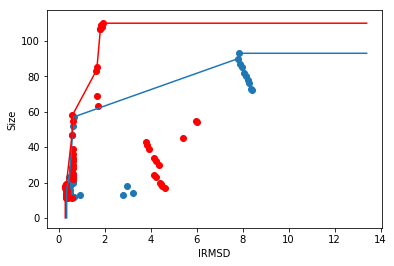

Done


In [5]:
pareto(stats_lrmsd_cd, stats_size_cd, stats_lrmsd_sfd, stats_size_sfd)
print("Done")

# Visual inspection of  motifs 

The executable also outputs a number of PyMol script to view motifs directly. Each motifs has a unique identifier and the scripts follow the same nomenclature: to view motif 31 look for the '_block_31_script.py' file.

To run the script from PyMol simply load the two structures and type 'run name_of_the_script.py' 
Below is the image of two motifs yielded from the previous comparisons.
As you can see our method allows to recover the blocks which are invariant in the conformational changes.


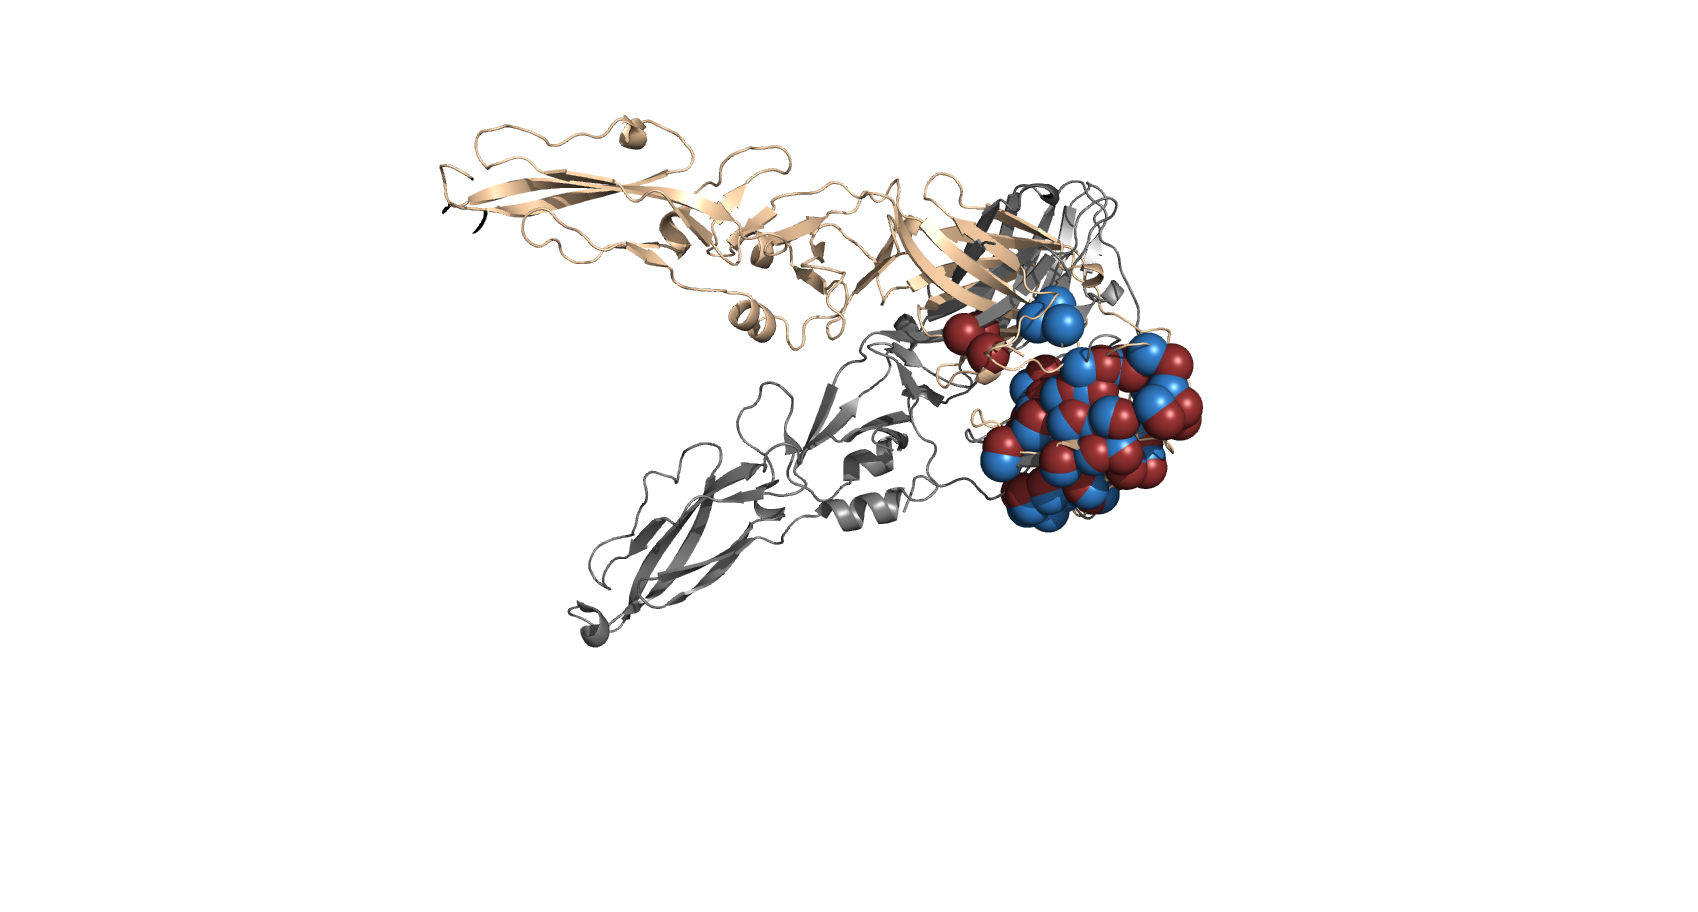

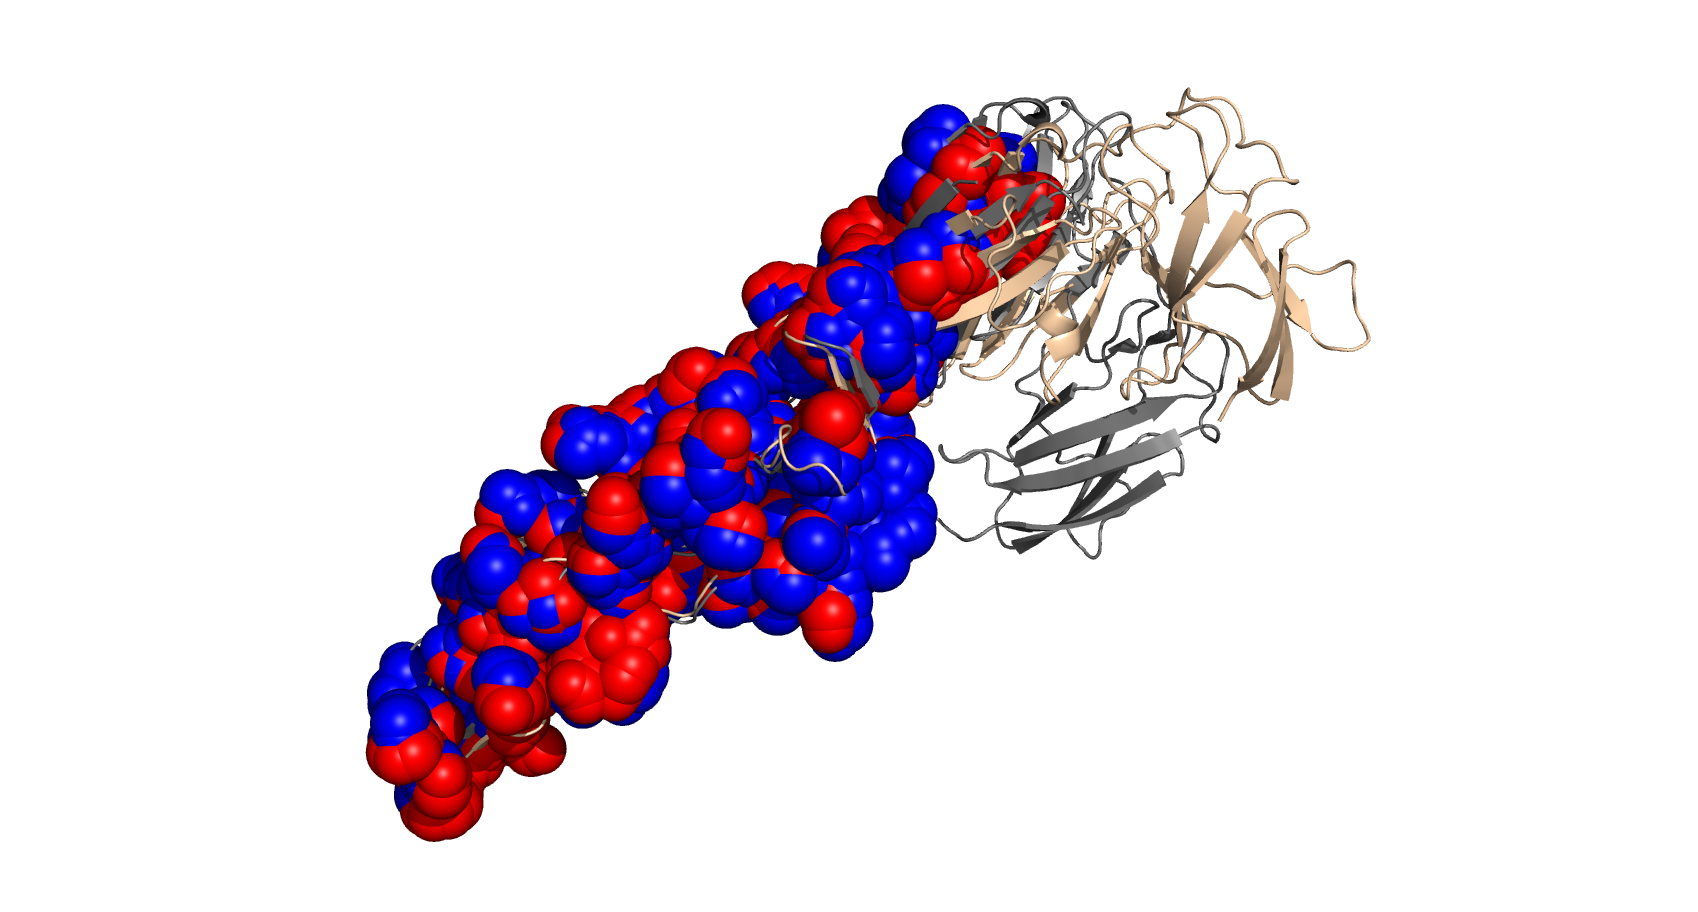

In [14]:
from IPython.display import Image

display(Image(filename ="fig/motif_51.png", width=500, height=500));
display(Image(filename ="fig/motif_54.png", width=500, height=500));